In [19]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
import random
import matplotlib.pyplot as plt
import joblib

In [2]:
# Function to load and preprocess images using Haar Cascade for face detection
def load_images_from_gender_folders(root_folder, image_width, image_height):
    images = []
    labels = []
    cascade_path = 'C:\\Users\\RAO\\Downloads\\Gender Detection Data set\\py files\\haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)
    
    for gender_folder in os.listdir(root_folder):
        gender_path = os.path.join(root_folder, gender_folder)
        
        print("Cascade Path:", cascade_path)
        print("Gender Path:", gender_path)
        
        for img_filename in os.listdir(gender_path):
            img_path = os.path.join(gender_path, img_filename)
            img = cv2.imread(img_path)
            
            if img is not None:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
                
                for (x, y, w, h) in faces:
                    face = gray[y:y+h, x:x+w]
                    face = cv2.resize(face, (image_width, image_height))  # Resize the face images
                    images.append(face.flatten())  # Flatten the image and add to the list
                    labels.append(gender_folder)  # Label based on gender folder
                    
    return images, labels

# Set image dimensions
image_width = 250
image_height = 250

# Folder paths for training
image_folder = 'C:\\Users\\RAO\\Downloads\\Gender Detection Data set\\Training'
xml_folder = 'C:\\Users\\RAO\\Downloads\\Gender Detection Data set\\py files'

# Load images and labels
images, labels = load_images_from_gender_folders(image_folder, image_width, image_height)

# Convert data and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)


Cascade Path: C:\Users\RAO\Downloads\Gender Detection Data set\py files\haarcascade_frontalface_default.xml
Gender Path: C:\Users\RAO\Downloads\Gender Detection Data set\Training\Female
Cascade Path: C:\Users\RAO\Downloads\Gender Detection Data set\py files\haarcascade_frontalface_default.xml
Gender Path: C:\Users\RAO\Downloads\Gender Detection Data set\Training\Male


In [3]:
# Count male and female images
num_male_images = np.sum(labels == 'Male')
num_female_images = np.sum(labels == 'Female')

print("Number of Male Images:", num_male_images)
print("Number of Female Images:", num_female_images)


Number of Male Images: 716
Number of Female Images: 864


In [4]:
import pandas as pd

# Convert images and labels arrays to DataFrames
image_df = pd.DataFrame(images)
label_df = pd.DataFrame(labels, columns=['Gender'])  # Assuming 'Gender' is the column name

# Concatenate image and label DataFrames
data_df = pd.concat([image_df, label_df], axis=1)

# Display the resulting DataFrame
data_df


,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,Gender
0,45,45,56,67,78,92,106,120,133,146,...,39,38,35,32,29,33,36,40,40,Female
1,9,9,10,10,11,13,17,20,25,30,...,143,141,140,140,138,138,137,136,136,Female
2,35,35,36,36,37,39,45,52,58,59,...,159,156,153,150,147,143,139,137,137,Female
3,17,17,18,19,21,21,21,22,24,27,...,56,56,55,55,52,43,35,27,27,Female
4,53,53,55,57,60,59,57,56,50,42,...,127,123,117,110,103,96,88,81,81,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,59,59,64,72,80,88,96,104,111,118,...,109,110,111,112,104,95,86,80,80,Male
1576,24,24,22,19,17,16,15,15,16,20,...,112,110,109,108,106,105,103,102,102,Male
1577,77,77,57,37,16,12,9,6,4,2,...,97,95,92,87,84,81,79,77,77,Male
1578,62,62,63,64,65,67,67,68,68,69,...,106,106,105,105,104,104,103,103,103,Male


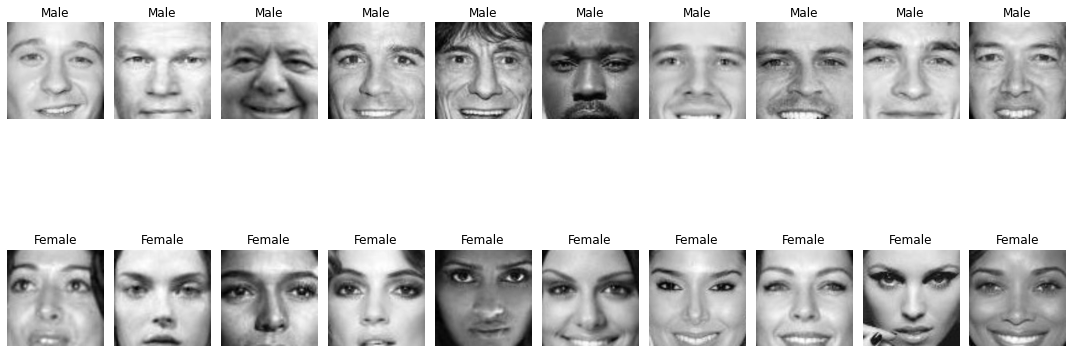

In [14]:
# Select the indexes of images from both male and female folders
male_indexes = np.where(labels == 'Male')[0]
female_indexes = np.where(labels == 'Female')[0]

# Select random indexes of images from both male and female folders
random_male_indexes = random.sample(list(male_indexes), 10)
random_female_indexes = random.sample(list(female_indexes), 10)

# Visualize random images from male folder
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_male_indexes):
    plt.subplot(2, 10, i + 1)
    plt.imshow(images[idx].reshape(image_height, image_width), cmap='gray')
    plt.title("Male")
    plt.axis('off')

# Visualize random images from female folder
for i, idx in enumerate(random_female_indexes):
    plt.subplot(2, 10, 10 + i + 1)
    plt.imshow(images[idx].reshape(image_height, image_width), cmap='gray')
    plt.title("Female")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Flatten and normalize image data
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [16]:
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {"accuracy": accuracy, "training_time": training_time}

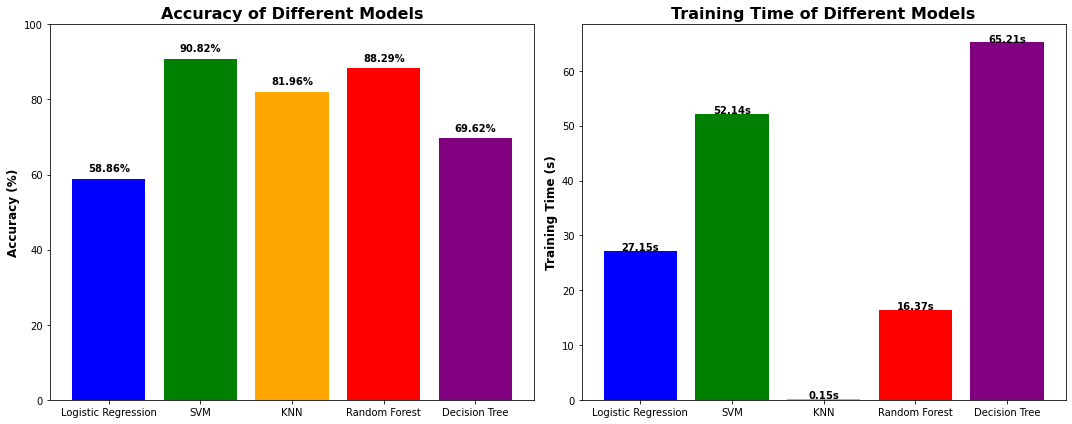

In [17]:
# Visualize results with engaging colors for each classifier
names = list(results.keys())
accuracies = [results[name]["accuracy"] * 100 for name in names]
training_times = [results[name]["training_time"] for name in names]

# Define distinct colors for each classifier
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(15, 6))

# Plot Accuracy of Different Models
plt.subplot(1, 2, 1)
bars = plt.bar(names, accuracies, color=colors)
plt.title("Accuracy of Different Models", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim([0, 100])  # Set y-axis limit for accuracy (0 to 100)

# Display accuracy values on the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 2, f"{accuracy:.2f}%", ha='center', color='black', fontweight='bold')

# Plot Training Time of Different Models
plt.subplot(1, 2, 2)
bars = plt.bar(names, training_times, color=colors)
plt.title("Training Time of Different Models", fontsize=16, fontweight='bold')
plt.ylabel("Training Time (s)", fontsize=12, fontweight='bold')

# Display training time values on the bars
for bar, time in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width() / 2, time + 0.1, f"{time:.2f}s", ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:
# Saving the best spcred trained model
chosen_model = SVC() 
chosen_model.fit(X_train, y_train)  # Fit the model to the training data
joblib.dump(chosen_model, 'gender_detection_model.pkl')  # Save the model to a file

['gender_detection_model.pkl']